# Evaluación de los modelos

Evaluamos los modelos con las diferentes métricas mencionadas en la práctica: 
| Métrica | Definición |
|---|---|
| F1-score (Fm) | Fm = 2 × (PR × RC) / (PR + RC) |
| Sensibilidad (S) | S = TP / (TP + FN) |
| Exactitud (Acc) | Acc = (TP + TN) / (TP + FP + FN + TN) |
| Especificidad (SP) | SP = TN / (FP + TN) |
| Recall (RC) | RC = TP / (TP + FN) |
| Precisión (PR) | PR = TP / (TP + FP) |
| Tasa de falsos negativos (FNR) | FNR = FN / (TP + FN) |
| Tasa de falsos positivos (FPR) | FPR = FP / (FP + TN) |

Para ello, usamos una función que se encarga de obtener todas las métricas excepto la curva ROC y el AUC.

In [29]:
import pandas as pd 
import numpy as np

def get_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> pd.DataFrame:
    
    # Cálculo de los valores de la matriz de confusión
    TN = np.sum((y_true == 0) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    
    # Sensibilidad
    S = TP / (TP + FN)
    # Exactitud
    Acc = (TP + TN) / (TP + FP + FN + TN)
    # Especificidad
    SP = TN / (FP + TN)
    # Recall
    RC = TP / (TP + FN)
    # Precisión
    PR = TP / (TP + FP)
    # Tasa de falsos negativos
    FNR = FN / (TP + FN)
    # Tasa de falsos positivos
    FPR = FP / (FP + TN)
    # F1-score
    Fm = 2 * (PR * RC) / (PR + RC)
    # Guardamos los resultados en un DataFrame
    results = pd.DataFrame({
        'metric': ['Sensibilidad', 'Exactitud', 'Especificidad', 'Recall', 'Precisión', 'Tasa de Falsos Negativos', 'Tasa de Falsos Positivos', 'F1-score'],
        'value': [S, Acc, SP, RC, PR, FNR, FPR, Fm]
    })


    return results

A continuación, generamos la curva ROC y el AUC (área bajo la curva).

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def get_roc_curve(y_true: np.ndarray, y_prob: np.ndarray, name: str) -> float:
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)

    # Calcular el AUC
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig(f'cross_validation_evaluation/{name}.png')
    plt.show()
    plt.close()
    
    return roc_auc

Por último, unimos los resultados de ambas funciones en un mismo Dataframe que se guarda en un CSV.

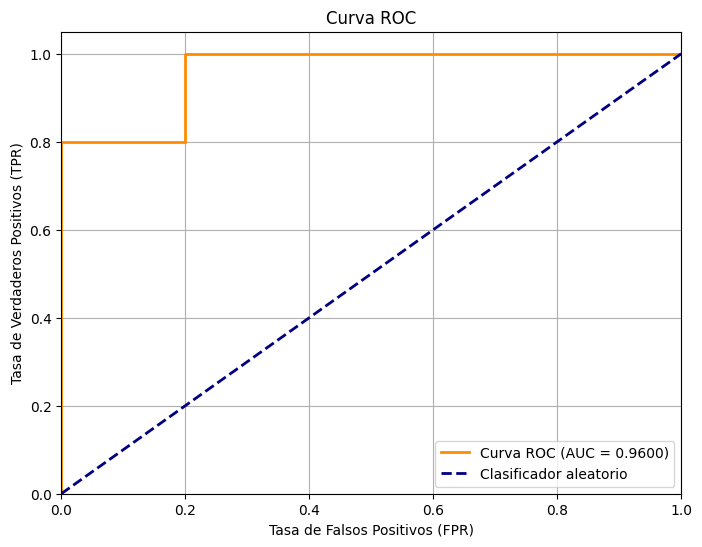

,metric,value
0,Sensibilidad,0.80
1,Exactitud,0.80
2,Especificidad,0.80
3,Recall,0.80
4,Precisión,0.80
5,Tasa de Falsos Negativos,0.20
6,Tasa de Falsos Positivos,0.20
7,F1-score,0.80
8,AUC,0.96


In [31]:
def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray, y_prob: np.ndarray, name: str) -> pd.DataFrame:
    metrics_df = get_metrics(y_true, y_pred)
    roc_auc = get_roc_curve(y_true, y_prob, name)
    
    # Añadir AUC al DataFrame de métricas
    auc_df = pd.DataFrame({
        'metric': ['AUC'],
        'value': [roc_auc]
    })
    
    final_results = pd.concat([metrics_df, auc_df], ignore_index=True)
    final_results.to_csv(f'cross_validation_evaluation/{name}.csv', index=False)
    
    return final_results

y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0])
y_pred = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0])
y_prob = np.array([0.1, 0.9, 0.4, 0.2, 0.8, 0.3, 0.85, 0.95, 0.6, 0.05])

evaluate_model(y_true, y_pred, y_prob, 'prueba')